In [ ]:
# Model the clusters 1 and 2 into a Random forest and Logistic regression.
# It helps us to validate how good the clustering is based on the accuracy of prediction.
# As well as to predict the clusters 1 and 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
# Import the clean dataset with cluster labels
df = pd.read_csv('df_with_clusters.csv')
df.set_index('Unnamed: 0', inplace=True)

# Remove the last column with 3 cluster labels as we dont need it in our current modelling
df.drop(df.columns[-1], axis=1, inplace=True)
df.head()

,adjsav_eduexp,ado_fert_rate,agedep_work,agedep_young,agrland,brate,fert_rate,c_gdp,grow_gdp,percap_gdp,percap_healthexp,healthexp_gdp,de_gdp,lifeexp_f,lifeexp_m,mortrate_un5f,mortrate_un5m,grow_pop,immu_dpt,immu_mea,hiv_fe15up,CO2emission,cluster
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,
AFG,2.8502,99.10,103.12,98.72,58.12,37.95,5.66,1.024325e+10,8.4300,1183.0500,44.19,2.35,9.4400,60.88,58.38,100.4,106.7,2.46,66.0,62.0,35.400,0.30,1
ALB,2.8400,16.99,49.10,34.04,43.84,12.61,1.74,1.072515e+10,3.5000,7791.7600,220.23,2.53,3.4600,80.15,73.96,16.3,19.7,-0.03,99.0,99.0,28.023,1.57,2
DZA,4.4700,9.89,46.74,39.80,17.37,24.51,2.82,1.170000e+11,3.6000,7249.2300,198.16,3.47,16.1200,72.23,69.08,19.0,23.8,1.85,95.0,95.0,66.400,3.14,2
ATG,2.1600,51.76,50.30,39.43,20.45,16.97,2.13,1.009446e+09,-7.7400,17610.2200,771.38,4.20,-0.0100,77.80,72.99,9.4,11.7,1.08,98.0,98.0,31.402,5.57,2
ARG,6.0100,55.37,55.03,38.57,53.61,17.19,2.21,2.030475e+11,3.4444,11827.0654,759.30,5.34,4.6613,79.46,72.05,13.3,16.3,0.87,94.0,98.0,32.700,4.12,2


In [3]:
# Lets recode the values 1 and 2 in the cluster column to 1 and 0
# This means that the cluster 1 representing underdeveloped countries will be 1 because they are of interest
# cluster 2 representing developed countries will be 0 becasue they are not of interest
df.loc[df['cluster'] == 1, 'cluster'] = 1
df.loc[df['cluster'] == 2, 'cluster'] = 0

In [4]:
df['cluster'].value_counts()

0    106
1     45
Name: cluster, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from collections import Counter

In [6]:
X = df.drop('cluster', axis=1)
y = df.cluster

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Random Forest
model_rf = RandomForestClassifier(n_jobs=-1, random_state=45)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9032258064516129


In [9]:
print(Counter(y_test))
pd.crosstab(y_test, y_pred)

Counter({0: 20, 1: 11})


col_0,0,1
cluster,,
0,20,0
1,3,8


In [10]:
# Logistic Regression
model_lr = LogisticRegression(random_state=45)
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6451612903225806


In [11]:
print(Counter(y_test))
pd.crosstab(y_test, y_pred)

Counter({0: 20, 1: 11})


col_0,0
cluster,
0,20
1,11


In [12]:
from xgboost import XGBClassifier
model_xg = XGBClassifier(random_state=42)
model_xg.fit(X_train, y_train)
y_pred = model_xg.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9354838709677419


In [13]:
print(Counter(y_test))
pd.crosstab(y_test, y_pred)

Counter({0: 20, 1: 11})


col_0,0,1
cluster,,
0,20,0
1,2,9


In [14]:
# plot ROC curve
# Prediction Probablitites:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = model_rf.predict_proba(X_test)
lr_probs = model_lr.predict_proba(X_test)
xg_probs = model_xg.predict_proba(X_test)

In [15]:
rf_probs

# The first column in the below array represnts prediction probabilities for the cluster 0
# and the second column represents the cluster 1

array([[0.97, 0.03],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.72, 0.28],
       [0.87, 0.13],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.09, 0.91],
       [1.  , 0.  ],
       [0.72, 0.28],
       [0.99, 0.01],
       [0.97, 0.03],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.02, 0.98],
       [1.  , 0.  ],
       [0.04, 0.96],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.63, 0.37],
       [0.08, 0.92],
       [0.97, 0.03]])

In [16]:
# Calculate the roc_auc_score for each model and for each cluster
# For cluster 1
r_auc = roc_auc_score(y_test, r_probs)
rf_auc_1 = roc_auc_score(y_test, rf_probs[:, 0])
lr_auc_1 = roc_auc_score(y_test, lr_probs[:, 0])
xg_auc_1 = roc_auc_score(y_test, xg_probs[:, 0])

# For cluster 2
rf_auc_2 = roc_auc_score(y_test, rf_probs[:, 1])
lr_auc_2 = roc_auc_score(y_test, lr_probs[:, 1])
xg_auc_2 = roc_auc_score(y_test, xg_probs[:, 1])

In [17]:
# Print the AUC scores:
print('Random Chance Prediction:', r_auc)
print('Random Forest AUC:', rf_auc_1, rf_auc_2)
print('Logistic Regression AUC:', lr_auc_1, lr_auc_2)
print('XG Boost AUC:' , np.round(xg_auc_1,3), np.round(xg_auc_2,3))

Random Chance Prediction: 0.5
Random Forest AUC: 0.0 1.0
Logistic Regression AUC: 0.5 0.5
XG Boost AUC: 0.005 0.995


In [18]:
# Calculate FPR and TPR
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)

rf_fpr_1, rf_tpr_1, _ = roc_curve(y_test, rf_probs[:, 0])
rf_fpr_2, rf_tpr_2, _ = roc_curve(y_test, rf_probs[:, 1])

lr_fpr_1, lr_tpr_1, _ = roc_curve(y_test, lr_probs[:, 0])
lr_fpr_2, lr_tpr_2, _ = roc_curve(y_test, lr_probs[:, 1])

xg_fpr_1, xg_tpr_1, _ = roc_curve(y_test, xg_probs[:, 0])
xg_fpr_2, xg_tpr_2, _ = roc_curve(y_test, xg_probs[:, 1])

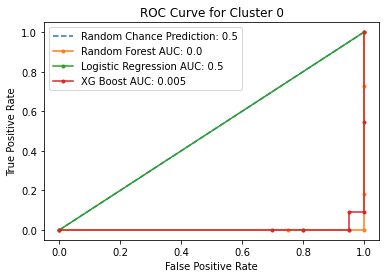

In [21]:
# Plotting the ROC curve

# For cluster 1:
plt.plot(r_fpr, r_tpr, linestyle = '--', label=f"Random Chance Prediction: {np.round(r_auc,3)}")
plt.plot(rf_fpr_1, rf_tpr_1, marker = '.' , label=f"Random Forest AUC: {np.round(rf_auc_1,3)}")
plt.plot(lr_fpr_1, lr_tpr_1, marker = '.' , label=f"Logistic Regression AUC: {np.round(lr_auc_1,3)}")
plt.plot(xg_fpr_1, xg_tpr_1, marker = '.' , label=f"XG Boost AUC: {np.round(xg_auc_1,3)}")

plt.title('ROC Curve for Cluster 0')
# Axis labels:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Legend:
plt.legend()
plt.show()

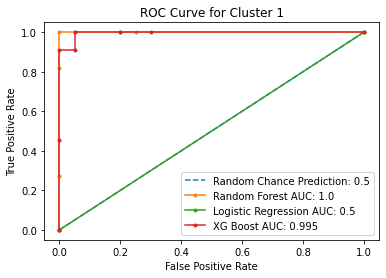

In [22]:
# For cluster 2:
plt.plot(r_fpr, r_tpr, linestyle = '--', label=f"Random Chance Prediction: {np.round(r_auc,3)}")
plt.plot(rf_fpr_2, rf_tpr_2, marker = '.' , label=f"Random Forest AUC: {np.round(rf_auc_2,3)}")
plt.plot(lr_fpr_2, lr_tpr_2, marker = '.' , label=f"Logistic Regression AUC: {np.round(lr_auc_2,3)}")
plt.plot(xg_fpr_2, xg_tpr_2, marker = '.' , label=f"XG Boost AUC: {np.round(xg_auc_2,3)}")

plt.title('ROC Curve for Cluster 1')
# Axis labels:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Legend:
plt.legend()
plt.show()